In [1]:
%run to_import.py
%matplotlib inline

In [2]:
segm_set=range(1,13)
data_folder='../../Data_Raw'
data_small='../../Data_Small_Tables'
replicas_all=range(13)
for segment in segm_set:
    replicas_all[segment]=pd.read_csv(data_folder+'/S'+str(segment)+'_merged_filtered_sum_10_size_4_with_fr.csv',sep='\t',index_col=0)

In [5]:
table_s12_k=pd.read_csv(data_small+'/table_s12_k_with_nons.csv',sep='\t',index_col=0)

### group by aa

In [4]:
#merge
aa_all=range(13)
for s in segm_set:
    replica=replicas_all[s]
    by_aa =replica[['aa_seq','t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var']].\
    groupby('aa_seq',as_index=False)
    aa_all[s]=by_aa.sum()
    aa_all[s]['size']=by_aa.size().values
    print s,len(replica),len(aa_all[s])

1 515086 126100
2 419808 123388
3 685432 95148
4 468060 69253
5 718331 100545
6 257527 84052
7 177617 26377
8 198701 73844
9 166104 88766
10 275314 80780
11 177863 37579
12 277175 63889


### Nonsense, use for plot

In [10]:
#single and many
nonsense_fitness_many=range(13)
nonsense_fitness=pd.DataFrame(columns=['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var'])
for s in segm_set:
    mask=replicas_all[s][(replicas_all[s]['aa_seq'].map(lambda x: x.count('_'))>1)]\
        [['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var']]
    nonsense_fitness.loc['S'+str(s)]=mask.sum()
    nonsense_fitness_many[s]=pd.DataFrame(columns=['t0_fr','t1_fr','t2_fr','t0_fr_var','t1_fr_var','t2_fr_var'])
    for i in range(100):
        nonsense_fitness_many[s].loc[i]=mask.sample(100).sum()


In [11]:
def plot_1(mask1,t0_t1,meme,s):

    plt.scatter(np.log((mask1['t1_fr'+meme])/(mask1['t0_fr'+meme])),np.log((mask1['t2_fr'+meme])/(mask1[t0_t1+'_fr'+meme]))\
    ,s=5,edgecolor='',alpha=alpha,c='g')

    #nons=nonsense_fitness.loc['S'+str(s)]
    nons=nonsense_fitness_many[s]
    plt.scatter(np.log((nons['t1_fr'+meme])/(nons['t0_fr'+meme])),np.log((nons['t2_fr'+meme])/(nons[t0_t1+'_fr'+meme]))\
    ,s=100,edgecolor='',alpha=alpha,c='r')

    plt.xlim(-3,3)
    plt.ylim(-10,3)
    plt.grid()
    plt.xlabel(r'$w_{01}=ln(f_{1}/f_{0})$')
    if (t0_t1=='t0'):
        plt.ylabel(r'$w_{02}=ln(f_{2}/f_{0})$')
    else:
        plt.ylabel(r'$w_{12}=ln(f_{2}/f_{1})$')

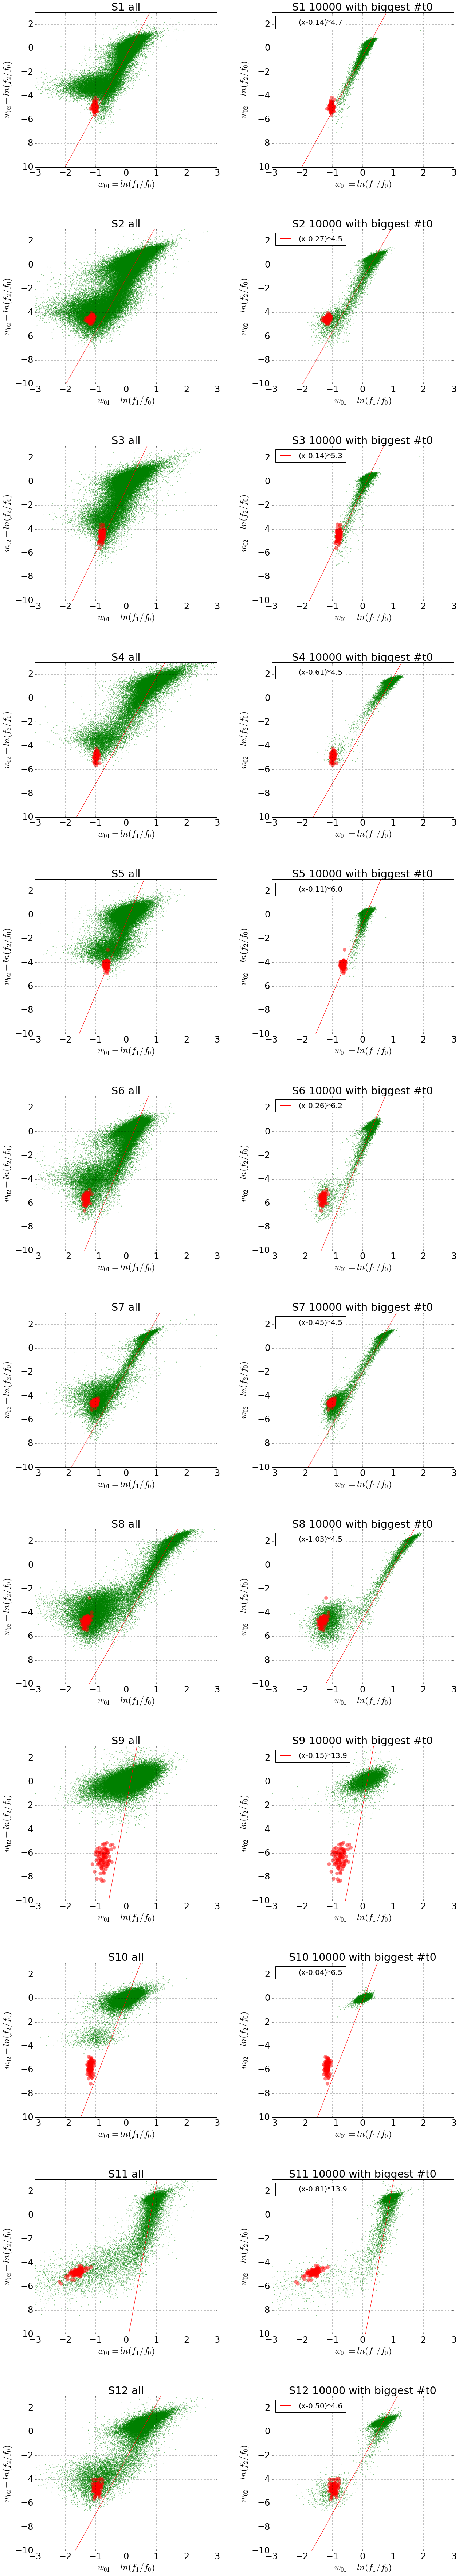

In [12]:
#look how k and s12 are on w01 vs w02
n_segm=12

fig=plt.figure(figsize=(2*10.3,n_segm*10.4))
plt.rcParams.update({'font.size': 24,'legend.fontsize': 20})
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

count=1
mask_size=10000

for s in segm_set:
    alpha=0.5
    
    plt.subplot(12,2,count)
    plt.plot(np.arange(-3,4,1),\
             map(lambda x:(x-table_s12_k.loc['S'+str(s),'s12'])*table_s12_k.loc['S'+str(s),'k'],np.arange(-3,4,1)),c='r')
    plot_1(aa_all[s],'t0','',s)
    plt.title('S%d all' %(s))
    count+=1
    
    plt.subplot(12,2,count)
    plt.plot(np.arange(-3,4,1),\
             map(lambda x:(x-table_s12_k.loc['S'+str(s),'s12'])*table_s12_k.loc['S'+str(s),'k'],np.arange(-3,4,1)),c='r')
    plot_1(aa_all[s].sort_values(by='t0_fr',ascending=False).iloc[:mask_size],'t0','',s)
    plt.title('S%d 10000 with biggest #t0' %(s))
    plt.legend(["(x-%.2f)*%.1f" %(table_s12_k.loc['S'+str(s),'s12'],table_s12_k.loc['S'+str(s),'k'])],loc=2)
    count+=1

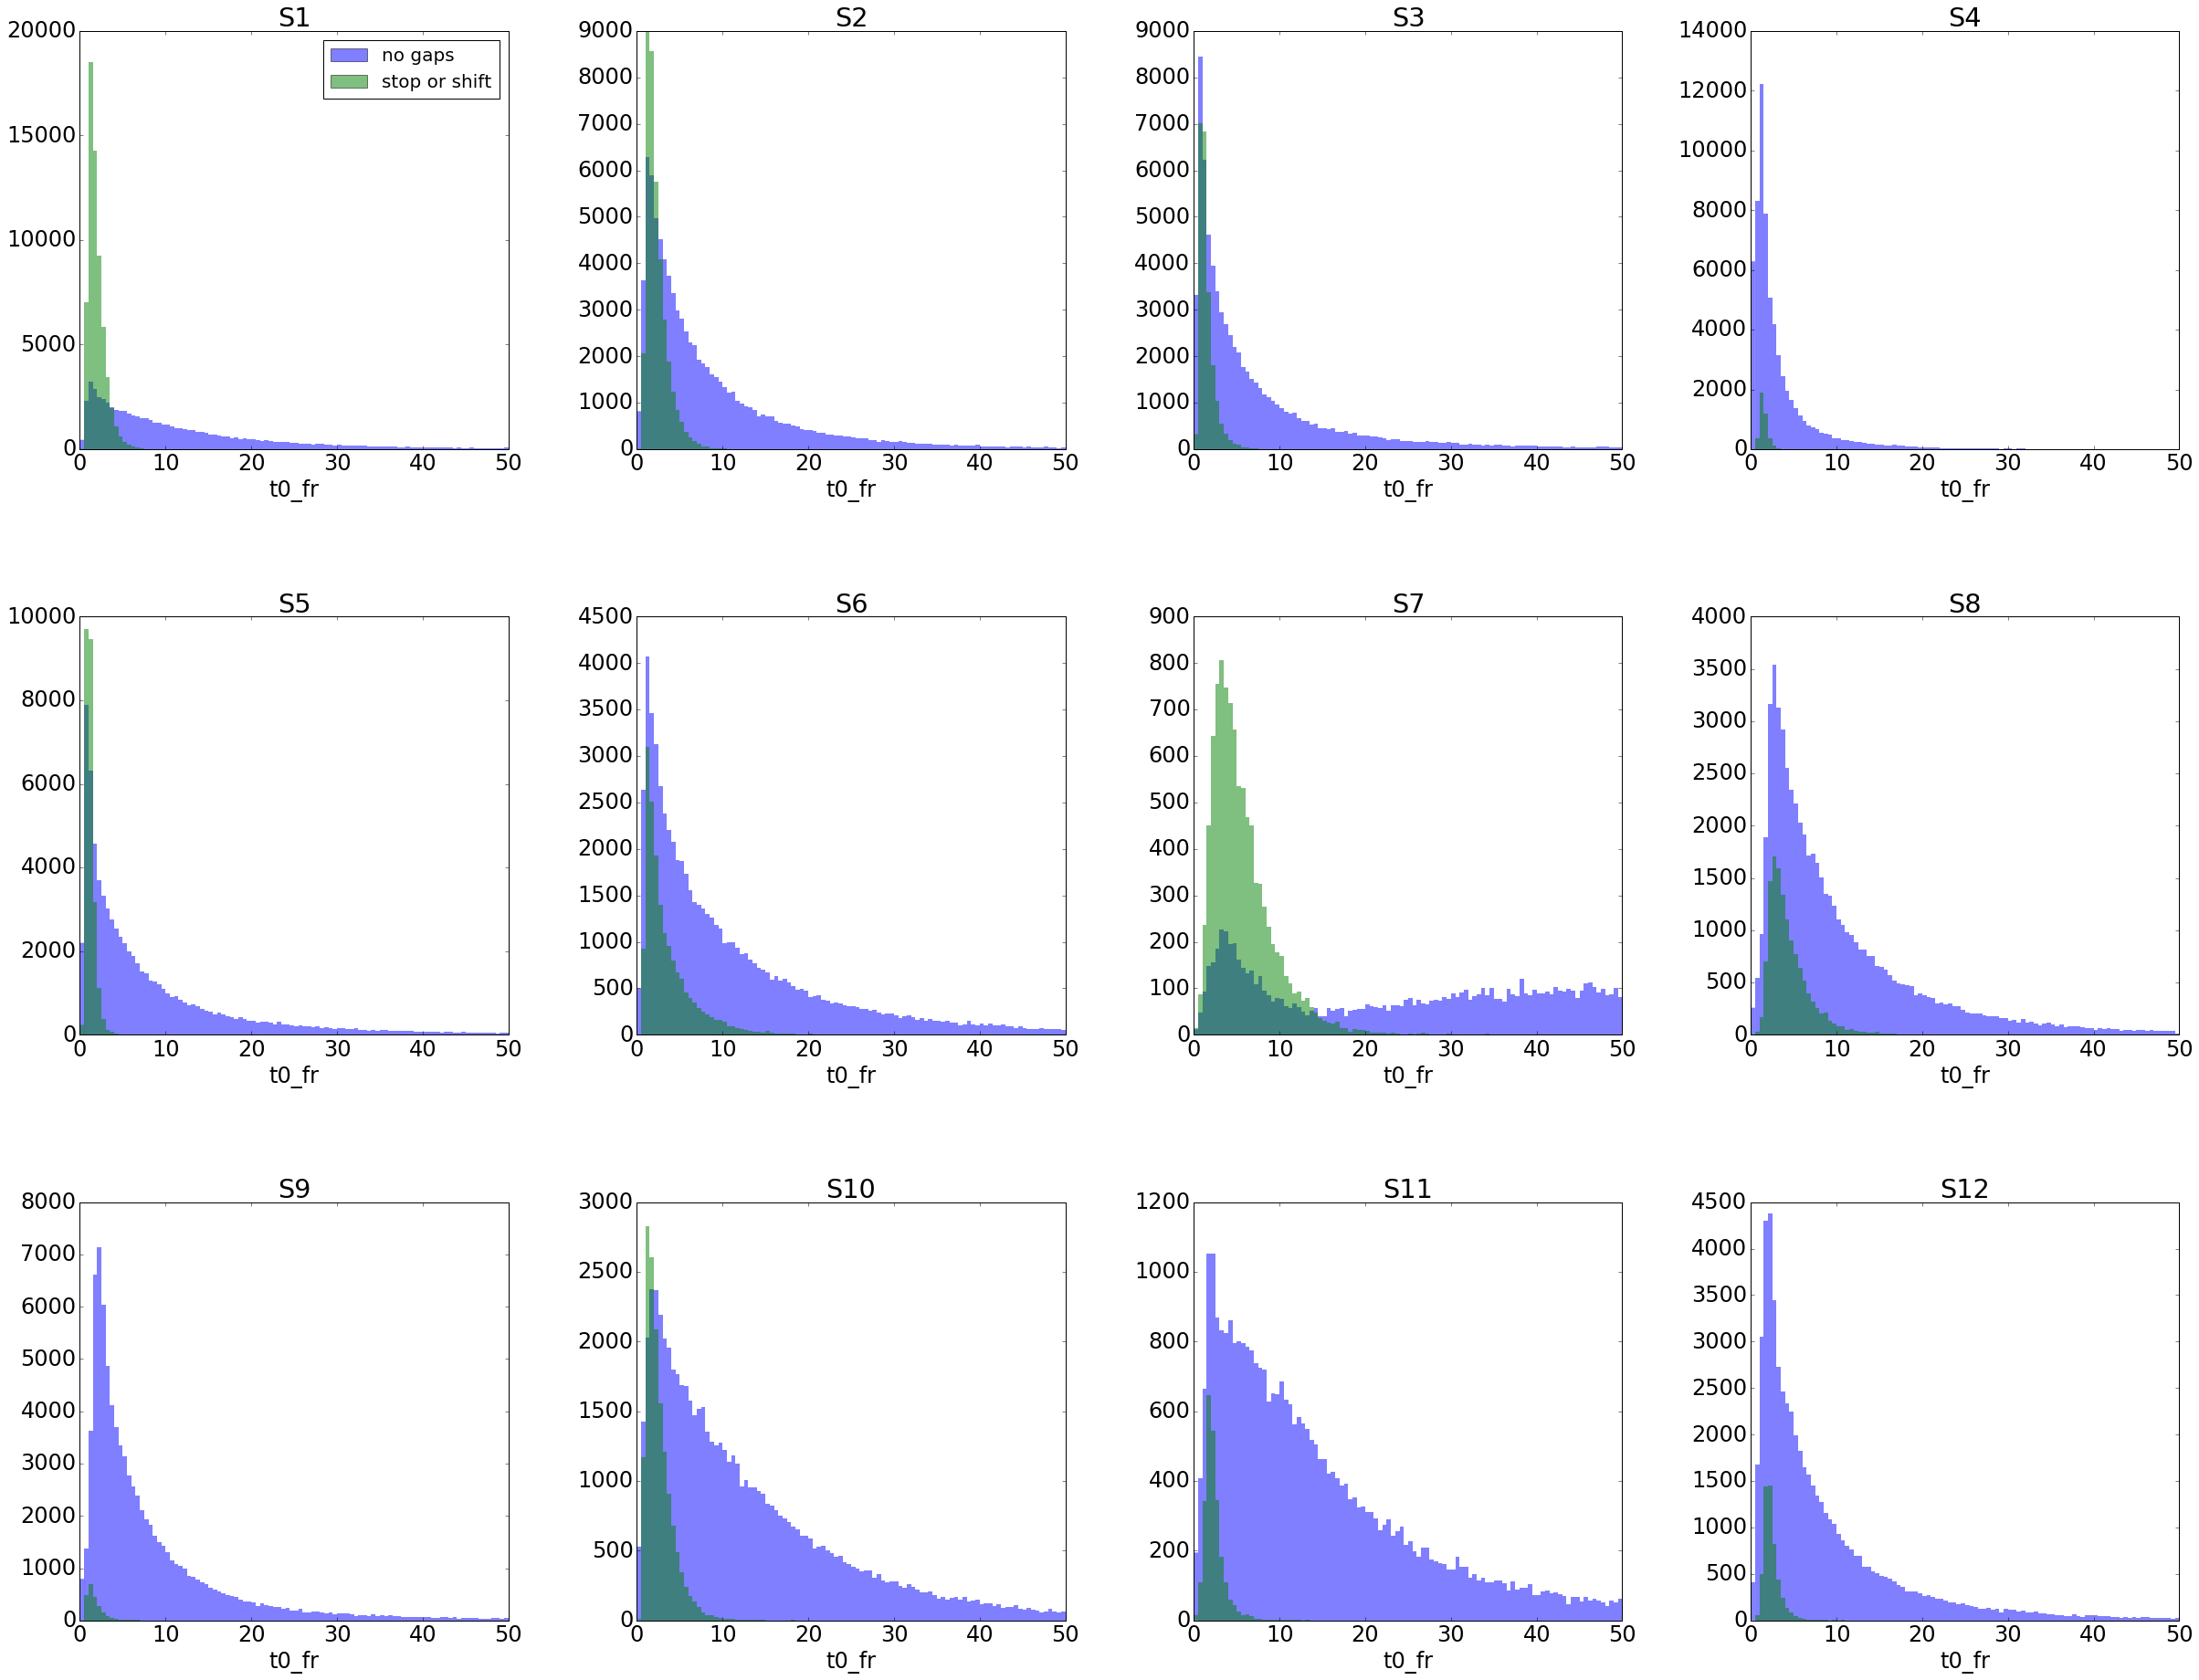

In [20]:
#histogram of t0_fr
fig=plt.figure(figsize=(4*10.3,3*10.4))
plt.rcParams.update({'font.size': 24,'legend.fontsize': 20})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)
count=1
for s in segm_set:
    plt.subplot(3,4,count)
    mask=aa_all[s][(aa_all[s]['aa_seq'].map(lambda x: x.count('_'))==0)]
    plt.hist(mask['t0_fr'],range=(0,50),bins=100,alpha=0.5,edgecolor='none')
    
    mask=aa_all[s][(aa_all[s]['aa_seq'].map(lambda x: x.count('_'))>=1)]
    plt.hist(mask['t0_fr'],range=(0,50),bins=100,alpha=0.5,edgecolor='none')
    plt.title('S'+str(s))
    plt.xlabel('t0_fr')
    if (s==1):
        plt.legend(['no gaps','stop or shift'])
    count+=1

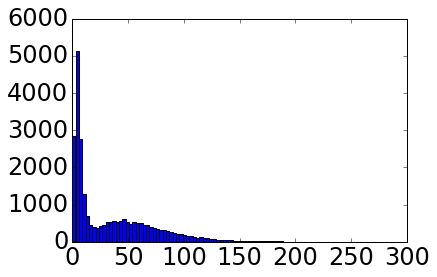

In [18]:
plt.hist(aa_all[7]['t0_fr'],bins=100,range=(0,300))
plt.show()
